# Example of a Camera Display to HTML5 via MPLD3



In [2]:
%matplotlib inline

In [ ]:
import matplotlib.pylab as plt
from ctapipe import io, visualization
from ctapipe.reco import mock
from ctapipe.reco import hillas_parameters
import numpy as np

Just a quick function to mark a pixel and draw lines to its neighbors

In [16]:
def draw_neighbors(geom, pixel_index, color='r', **kwargs):
    """ draw lines between a pixel and its neighbors"""
    neigh = geom.neighbors[pixel_index]  # neighbor indices (not pixel ids)
    x, y = geom.pix_x[pixel_index].value, geom.pix_y[pixel_index].value
    for nn in neigh:
        nx, ny = geom.pix_x[nn].value, geom.pix_y[nn].value
        plt.plot([x, nx], [y, ny], color=color, **kwargs)

Now, let's create a fake Cherenkov image from a given `CameraGeometry` and fill it with some data:

In [17]:
# get the HESS demo camera geometry
geom = io.CameraGeometry.from_name("hess", 1)

# create a fake camera image to display:
model = mock.generate_2d_shower_model(centroid=(0.2, 0.0),
                                      width=0.01,
                                      length=0.1,
                                      psi='35d')

image, sig, bg = mock.make_mock_shower_image(geom, model.pdf, 
                                             intensity=50,
                                             nsb_level_pe=1000)

# apply really stupid image cleaning (single threshold):
clean = image.copy()
clean[image <= 3.0 * image.mean()] = 0.0

# calculate image parameters
hillas = hillas_parameters(geom.pix_x.value, geom.pix_y.value, clean)
print(hillas)

MomentParameters(size=21801.764583333334, cen_x=0.1946367704037085, cen_y=0.013372938952879344, length=0.32476478838377976, width=0.099166623339490514, r=0.1950956378021389, phi=0.068599346544734013, psi=0.61811163596763607, miss=0.16637352938772618)


/Users/kosack/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


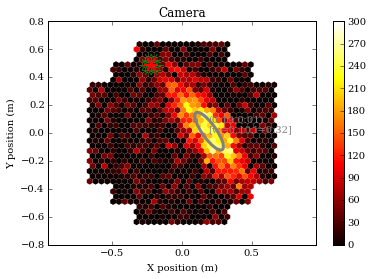

In [19]:
# show the camera image and overlay Hillas ellipse
disp = visualization.CameraDisplay(geom)
disp.set_limits_minmax(0, 300)
disp.add_colorbar()
disp.image = image
disp.overlay_moments(hillas, color='grey', linewidth=3,zorder=10)

# draw the neighbors of pixel 100 in red, and the
# neighbor-neighbors in green
for ii in geom.neighbors[130]:
    draw_neighbors(geom, ii, color='green')
draw_neighbors(geom, 130, color='red',lw=2)

For online use, you can use the mpld3 library to automatically convert this to a zoomable HTML5 plot if you like. Simply call `display()` at the end of the code:

    import mpld3
    ...
    mpld3.display()